<a href="https://colab.research.google.com/github/miYo-0/Maleria-Cases-in-Africa/blob/main/Malaria_Cases_in_Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center> <H1> Team Flask Capstone Project - Winter '23 </H1> </center>

### Project Title: The Place of AI in Tackling the Challenge of Malaria in Africa
### Content
This dataset includes malaria data on all African countries from 2007 till 2017. The dataset includes the cases of malaria that have been reported in each country and each year, as well as data on preventive measures that have been taken to prevent malaria. The dataset was from the world bank open data source and retrieved from [Kaggle](https://www.kaggle.com/datasets/lydia70/malaria-in-africa).

# Import libraries

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# mounting google drive to google colab
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# load dataset

#dataset = pd.read_csv("DatasetAfricaMalaria.csv")
#print("Data imported successfully")

dataset = pd.read_csv("/content/drive/MyDrive/Dataset/DatasetAfricaMalaria.csv")

print("Data imported successfully")

Data imported successfully


In [ ]:
# create a copy of the original dataset
df = dataset.copy()

# Data Inspection

In [ ]:
# inspect dataframe by printing out the first 5 rows
df.head()

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)",...,Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,...,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,...,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,...,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,...,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,...,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)


In [ ]:
#display all columns for better visibility
pd.set_option('display.max_columns', None)

In [ ]:
#explore top 5 and bottom 5 data (full columns)
df

,Country Name,Year,Country Code,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),"People using safely managed sanitation services, rural (% of rural population)","People using safely managed sanitation services, urban (% of urban population)",Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.24,19.96,17.33,34.65,-0.60,65.35,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,NaN,NaN,NaN,NaN,42.48,1.91,57.52,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.44,1.99,41.56,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,83.96,NaN,NaN,NaN,42.07,-1.44,57.93,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.00,2.16,23.00,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,Togo,2017,TGO,278.20,1755577.0,69.7,31.1,41.7,NaN,NaN,NaN,NaN,NaN,NaN,58.84,1.58,41.16,3.79,65.13,48.39,89.06,16.13,7.40,28.61,8.619543,0.824782,POINT (8.619543 0.824782)
590,Tunisia,2017,TUN,NaN,NaN,NaN,NaN,NaN,92.66,NaN,NaN,78.12,NaN,88.29,31.36,0.20,68.64,1.57,96.25,88.71,99.70,90.92,81.35,95.29,33.886917,9.537499,POINT (33.886917 9.537499)
591,Uganda,2017,UGA,336.76,11667831.0,NaN,NaN,NaN,7.07,4.46,15.70,NaN,NaN,NaN,76.80,3.01,23.20,6.25,49.10,41.25,75.11,18.47,16.17,26.11,1.373333,32.290275,POINT (1.373333 32.290275)
592,Zambia,2017,ZMB,160.05,5505639.0,NaN,NaN,NaN,NaN,NaN,46.25,NaN,NaN,NaN,57.02,2.01,42.98,4.21,59.96,41.95,83.86,26.37,18.93,36.24,-13.133897,27.849332,POINT (-13.133897 27.849332)


In [ ]:
# statistical description
df.describe()

,Year,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),"People using safely managed sanitation services, rural (% of rural population)","People using safely managed sanitation services, urban (% of urban population)",Rural population (% of total population),Rural population growth (annual %),Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude
count,594.000000,550.000000,5.500000e+02,132.000000,122.000000,106.000000,99.000000,88.000000,176.000000,132.000000,110.000000,132.000000,588.000000,588.000000,588.000000,588.000000,588.000000,566.000000,566.000000,588.000000,566.000000,566.000000,594.000000,594.000000
mean,2012.000000,190.087491,1.068330e+06,42.530303,30.201639,15.013958,33.478990,12.470568,51.549545,28.768939,14.361727,32.174621,56.836650,1.389371,43.164116,3.523061,65.994915,51.449576,84.268498,39.469796,28.077208,48.088375,2.828796,17.342546
std,3.164943,163.054527,2.192802e+06,20.157059,18.903198,12.389166,26.678321,10.078371,24.157416,18.631510,7.088038,21.693458,18.086328,1.199693,18.086118,1.456244,17.283361,18.927868,9.307285,26.304934,24.046725,21.802128,15.678226,20.041257
min,2007.000000,0.000000,0.000000e+00,1.000000,0.500000,0.000000,5.770000,0.930000,11.200000,6.370000,2.300000,7.950000,11.020000,-3.450000,9.860000,-4.650000,28.960000,17.050000,52.010000,4.990000,1.890000,12.580000,-30.559482,-24.013197
25%,2009.000000,30.857500,2.211750e+03,26.675000,17.275000,5.763285,8.975000,4.185000,34.125000,16.532500,7.200000,18.262500,43.057500,0.410000,28.795000,2.512500,52.375000,37.075000,78.080000,18.197500,8.842500,30.775000,-6.369028,0.824782
50%,2012.000000,174.775000,1.130260e+05,42.900000,29.300000,11.500000,28.390000,10.675000,51.365000,25.410000,15.950000,22.755000,58.445000,1.675000,41.560000,3.730000,64.470000,50.435000,85.420000,32.555000,18.815000,44.695000,6.744051,18.611308
75%,2015.000000,347.637500,1.154808e+06,56.325000,42.625000,21.850000,43.890000,16.887500,70.747500,35.725000,20.315000,39.225000,71.205000,2.130000,56.945000,4.450000,79.165000,62.245000,90.082500,54.810000,38.082500,58.845000,12.862807,31.465866
max,2017.000000,585.540000,1.682113e+07,95.500000,76.900000,59.600000,92.660000,39.930000,89.540000,78.120000,25.540000,88.290000,90.140000,7.090000,88.980000,7.400000,99.870000,99.830000,99.920000,100.000000,95.180000,98.300000,33.886917,57.552152


**OBSERVATIONS:** 
-Incidence report with zero malaria case recorded (see for example Year 2007 for Benin, Cameroon, Central African Republic, Cote d'Ivoire, Egypt, Gambia, Kenya, Libya, Malawi, Mali, Mauritania, Morocco, Nigeria, Sierra Leone, South Sudan, Zambia).

-Header name columns are too long. 

-Indicator of malaria will use 'Malaria cases' and 'Incidence rate'. 

-Many NaN values.

In [ ]:
# return a total count for each year in the dataset
df.Year.value_counts()

2007    54
2008    54
2009    54
2010    54
2011    54
2012    54
2013    54
2014    54
2015    54
2016    54
2017    54
Name: Year, dtype: int64

In [ ]:
# return a total count for each country in the dataset
df['Country Name'].value_counts()

Algeria                     11
Sao Tome and Principe       11
Madagascar                  11
Malawi                      11
Mali                        11
Mauritania                  11
Mauritius                   11
Morocco                     11
Mozambique                  11
Namibia                     11
Niger                       11
Nigeria                     11
Rwanda                      11
Senegal                     11
Angola                      11
Seychelles                  11
Sierra Leone                11
Somalia                     11
South Africa                11
South Sudan                 11
Sudan                       11
Tanzania                    11
Togo                        11
Tunisia                     11
Uganda                      11
Zambia                      11
Libya                       11
Liberia                     11
Lesotho                     11
Kenya                       11
Benin                       11
Botswana                    11
Burkina 

In [ ]:
# check the shape of the dataset i.e. the number of rows and columns
df.shape

(594, 27)

In [ ]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 27 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Country Name                                                                             594 non-null    object 
 1   Year                                                                                     594 non-null    int64  
 2   Country Code                                                                             594 non-null    object 
 3   Incidence of malaria (per 1,000 population at risk)                                      550 non-null    float64
 4   Malaria cases reported                                                                   550 non-null    float64
 5   Use of insecticide-treated bed nets (% of under-5 population)   

In [ ]:
# Check the datatype counts of the dataset
df.dtypes.value_counts()

float64    23
object      3
int64       1
dtype: int64

In [ ]:
# number of unique values in each features
df.nunique()

Country Name                                                                                54
Year                                                                                        11
Country Code                                                                                54
Incidence of malaria (per 1,000 population at risk)                                        499
Malaria cases reported                                                                     467
Use of insecticide-treated bed nets (% of under-5 population)                              117
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    110
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)       95
People using safely managed drinking water services (% of population)                       99
People using safely managed drinking water services, rural (% of rural population)          87
People using safely managed drinking water service

In [ ]:
# check for duplicated record
df.duplicated().any()

False

In [ ]:
# check for missingness in the features
df.isnull().sum()

Country Name                                                                                 0
Year                                                                                         0
Country Code                                                                                 0
Incidence of malaria (per 1,000 population at risk)                                         44
Malaria cases reported                                                                      44
Use of insecticide-treated bed nets (% of under-5 population)                              462
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    472
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      488
People using safely managed drinking water services (% of population)                      495
People using safely managed drinking water services, rural (% of rural population)         506
People using safely managed drinking water service

In [ ]:
# check for % of null record
round(df.isnull().sum()/len(df)*100, 2)

Country Name                                                                                0.00
Year                                                                                        0.00
Country Code                                                                                0.00
Incidence of malaria (per 1,000 population at risk)                                         7.41
Malaria cases reported                                                                      7.41
Use of insecticide-treated bed nets (% of under-5 population)                              77.78
Children with fever receiving antimalarial drugs (% of children under age 5 with fever)    79.46
Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)      82.15
People using safely managed drinking water services (% of population)                      83.33
People using safely managed drinking water services, rural (% of rural population)         85.19
People using safely managed dr

**Observation**

- More than 70% missing records for malaria preventive measures.

# Data transformation

In [ ]:
# print column names
df.columns

Index(['Country Name', 'Year', 'Country Code',
       'Incidence of malaria (per 1,000 population at risk)',
       'Malaria cases reported',
       'Use of insecticide-treated bed nets (% of under-5 population)',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'People using safely managed drinking water services (% of population)',
       'People using safely managed drinking water services, rural (% of rural population)',
       'People using safely managed drinking water services, urban (% of urban population)',
       'People using safely managed sanitation services (% of population)',
       'People using safely managed sanitation services, rural (% of rural population)',
       'People using safely managed sanitation services, urban  (% of urban population)',
       'Rural population (% of total population)',
       'Rural popula

In [ ]:
# rename columns using dictionary 

mapping = {df.columns[3]: 'Incidence rate',
           df.columns[4]: 'Malaria cases',
           df.columns[5]: '% Use ITNs',
           df.columns[6]: '% Child fever',
           df.columns[7]: '% IPT',
           df.columns[8]: '% Safe DW all',
           df.columns[9]: '% Safe DW rural',
           df.columns[10]: '% Safe DW urban',
           df.columns[11]: '% Safe sanitation all',
           df.columns[12]: '% Safe sanitation rural',
           df.columns[13]: '% Safe sanitation urban',
           df.columns[14]: '% Rural pop',
           df.columns[15]: '% Rural annual growth',
           df.columns[16]: '% Urban pop',
           df.columns[17]: '% Urban annual growth',
           df.columns[18]: '% Basic DW all',
           df.columns[19]: '% Basic DW rural',
           df.columns[20]: '% Basic DW urban',
           df.columns[21]: '% Basic sanitation all',
           df.columns[22]: '% Basic sanitation rural',
           df.columns[23]: '% Basic sanitation urban'}

df = df.rename(columns=mapping)

In [ ]:
# print Data frame after rename columns
df.head()

,Country Name,Year,Country Code,Incidence rate,Malaria cases,% Use ITNs,% Child fever,% IPT,% Safe DW all,% Safe DW rural,% Safe DW urban,% Safe sanitation all,% Safe sanitation rural,% Safe sanitation urban,% Rural pop,% Rural annual growth,% Urban pop,% Urban annual growth,% Basic DW all,% Basic DW rural,% Basic DW urban,% Basic sanitation all,% Basic sanitation rural,% Basic sanitation urban,latitude,longitude,geometry
0,Algeria,2007,DZA,0.01,26.0,NaN,NaN,NaN,NaN,NaN,NaN,18.24,19.96,17.33,34.65,-0.60,65.35,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626)
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,NaN,NaN,NaN,NaN,NaN,NaN,42.48,1.91,57.52,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887)
2,Benin,2007,BEN,480.24,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.44,1.99,41.56,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834)
3,Botswana,2007,BWA,1.03,390.0,NaN,NaN,NaN,NaN,NaN,83.96,NaN,NaN,NaN,42.07,-1.44,57.93,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866)
4,Burkina Faso,2007,BFA,503.80,44246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.00,2.16,23.00,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593)


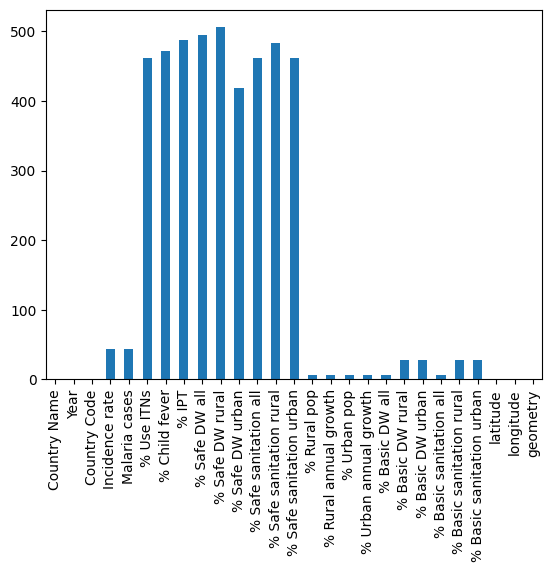

In [ ]:
# plot the missingness in the features
df.isnull().sum().plot(kind='bar');

In [ ]:
# fill missing values with 0
df = df.fillna(0)

In [ ]:
# confirm there isn't null record after fill
df.isnull().sum()

Country Name                0
Year                        0
Country Code                0
Incidence rate              0
Malaria cases               0
% Use ITNs                  0
% Child fever               0
% IPT                       0
% Safe DW all               0
% Safe DW rural             0
% Safe DW urban             0
% Safe sanitation all       0
% Safe sanitation rural     0
% Safe sanitation urban     0
% Rural pop                 0
% Rural annual growth       0
% Urban pop                 0
% Urban annual growth       0
% Basic DW all              0
% Basic DW rural            0
% Basic DW urban            0
% Basic sanitation all      0
% Basic sanitation rural    0
% Basic sanitation urban    0
latitude                    0
longitude                   0
geometry                    0
dtype: int64

In [ ]:
# plot summary statistics after null handling
df.describe()

,Year,Incidence rate,Malaria cases,% Use ITNs,% Child fever,% IPT,% Safe DW all,% Safe DW rural,% Safe DW urban,% Safe sanitation all,% Safe sanitation rural,% Safe sanitation urban,% Rural pop,% Rural annual growth,% Urban pop,% Urban annual growth,% Basic DW all,% Basic DW rural,% Basic DW urban,% Basic sanitation all,% Basic sanitation rural,% Basic sanitation urban,latitude,longitude
count,594.000000,594.000000,5.940000e+02,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,2012.000000,176.006936,9.891945e+05,9.451178,6.203030,2.679259,5.579832,1.847492,15.273939,6.393098,2.659579,7.149916,56.262542,1.375337,42.728114,3.487475,65.328300,49.024343,80.296246,39.071111,26.753704,45.821582,2.828796,17.342546
std,3.164943,164.610210,2.128383e+06,20.072904,14.900588,7.764126,16.539561,5.878874,26.967129,14.831641,6.356886,16.828195,18.872221,1.201680,18.505645,1.491142,18.420489,21.457954,20.050689,26.467937,24.215905,23.599405,15.678226,20.041257
min,2007.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.450000,0.000000,-4.650000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-30.559482,-24.013197
25%,2009.000000,6.950000,3.080000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,42.097500,0.370000,28.372500,2.452500,51.972500,34.907500,76.302500,18.032500,7.532500,28.015000,-6.369028,0.824782
50%,2012.000000,127.355000,5.258350e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,58.405000,1.660000,41.355000,3.725000,64.195000,49.385000,84.905000,32.365000,18.170000,43.250000,6.744051,18.611308
75%,2015.000000,337.367500,1.041084e+06,0.000000,0.000000,0.000000,0.000000,0.000000,24.122500,0.000000,0.000000,0.000000,70.372500,2.127500,56.365000,4.435000,78.942500,61.405000,89.865000,54.515000,36.640000,57.627500,12.862807,31.465866
max,2017.000000,585.540000,1.682113e+07,95.500000,76.900000,59.600000,92.660000,39.930000,89.540000,78.120000,25.540000,88.290000,90.140000,7.090000,88.980000,7.400000,99.870000,99.830000,99.920000,100.000000,95.180000,98.300000,33.886917,57.552152


[**Click to explore Regions in Africa**](https://www.worldatlas.com/geography/regions-of-africa.html)

In [ ]:
# create lists to split Africa into five blocks
east = ['Uganda', 'South Sudan', 'Congo, Dem. Rep.', 'Rwanda', 'Tanzania', 'Kenya', 'Burundi', 'Somalia', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Madagascar', 'Malawi', 'Mauritius', 'Mozambique', 'Seychelles', 'Zambia']
south = ['Botswana', 'Lesotho', 'Namibia', 'South Africa', 'Eswatini', 'Zimbabwe']
north = ['Algeria', 'Egypt, Arab Rep.', 'Libya', 'Morocco', 'Tunisia', 'Western Sahara', 'Sudan']
west = ["Cote d'Ivoire", 'Ghana', 'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali', 'Mauritania', 'Niger', 'Nigeria', 'Senegal', 'Sierra Leone', 'Togo', 'Benin', 'Burkina Faso', 'Cabo Verde', 'Gambia, The']
central = ['Angola', 'Cameroon', 'Central African Republic', 'Chad', 'Congo, Dem. Rep.', 'Congo, Rep.','Equatorial Guinea', 'Gabon', 'Sao Tome and Principe']


In [ ]:
# create a dictionary of regions and countries
regions = {'East Africa': east, 'Southern Africa': south, 'North Africa': north, 'West Africa': west, 'Central Africa': central}

# create a function to map countries to regions
def get_region(country):
    for region, countries in regions.items():
        if country in countries:
            return region
    return None

# create a new column 'Region'
df['Region'] = df['Country Name'].apply(get_region)

In [ ]:
#Inspect summed statistics of grouped countries as region
df.groupby('Region').sum()

,Year,Incidence rate,Malaria cases,% Use ITNs,% Child fever,% IPT,% Safe DW all,% Safe DW rural,% Safe DW urban,% Safe sanitation all,% Safe sanitation rural,% Safe sanitation urban,% Rural pop,% Rural annual growth,% Urban pop,% Urban annual growth,% Basic DW all,% Basic DW rural,% Basic DW urban,% Basic sanitation all,% Basic sanitation rural,% Basic sanitation urban,latitude,longitude
Region,,,,,,,,,,,,,,,,,,,,,,,,
Central Africa,177056,21195.49,38754720.0,544.8,335.1,187.745840,452.95,157.49,617.96,0.00,0.00,0.00,3728.83,88.63,5071.23,344.90,5376.75,3489.93,6776.71,3051.70,1920.56,4057.03,209.415338,1256.401729
East Africa,398376,29796.41,325054622.0,2494.8,1602.3,534.398675,168.54,64.75,2468.03,573.59,527.13,696.66,13042.80,377.42,6157.37,735.38,11177.55,7980.95,14771.62,6816.19,4551.64,7397.97,-731.418875,7567.713626
North Africa,132792,388.44,7265664.0,25.3,100.8,0.438460,1688.42,380.28,970.30,2344.87,224.94,2294.85,2748.76,43.95,3851.27,138.86,5665.89,4114.06,5047.83,5301.29,3679.20,4706.20,1757.071393,905.967590
Southern Africa,132792,1208.17,3571694.0,146.8,71.2,30.002318,0.00,0.00,2796.44,0.00,0.00,206.76,3823.67,8.13,2776.40,160.53,5013.89,4190.90,6263.94,3335.13,2738.15,3933.17,-1660.928775,1704.638243
West Africa,354112,51959.61,212934849.0,2402.3,1575.2,838.894305,1004.51,494.89,2219.99,879.04,827.72,1048.78,10075.89,298.82,7524.23,691.89,11570.93,9344.62,14835.87,4703.93,3002.15,7123.65,2106.165754,-1133.249040


In [ ]:
# create a copy of the transformed dataset for modeling
model_data = df.copy()

In [ ]:
# convert 'malaria cases reported' datatype to integer
df['Malaria cases'] = df['Malaria cases'].astype(int)

In [ ]:
# convert year to date time 
from datetime import datetime

df['Year'] = pd.to_datetime(df.Year,format='%Y')

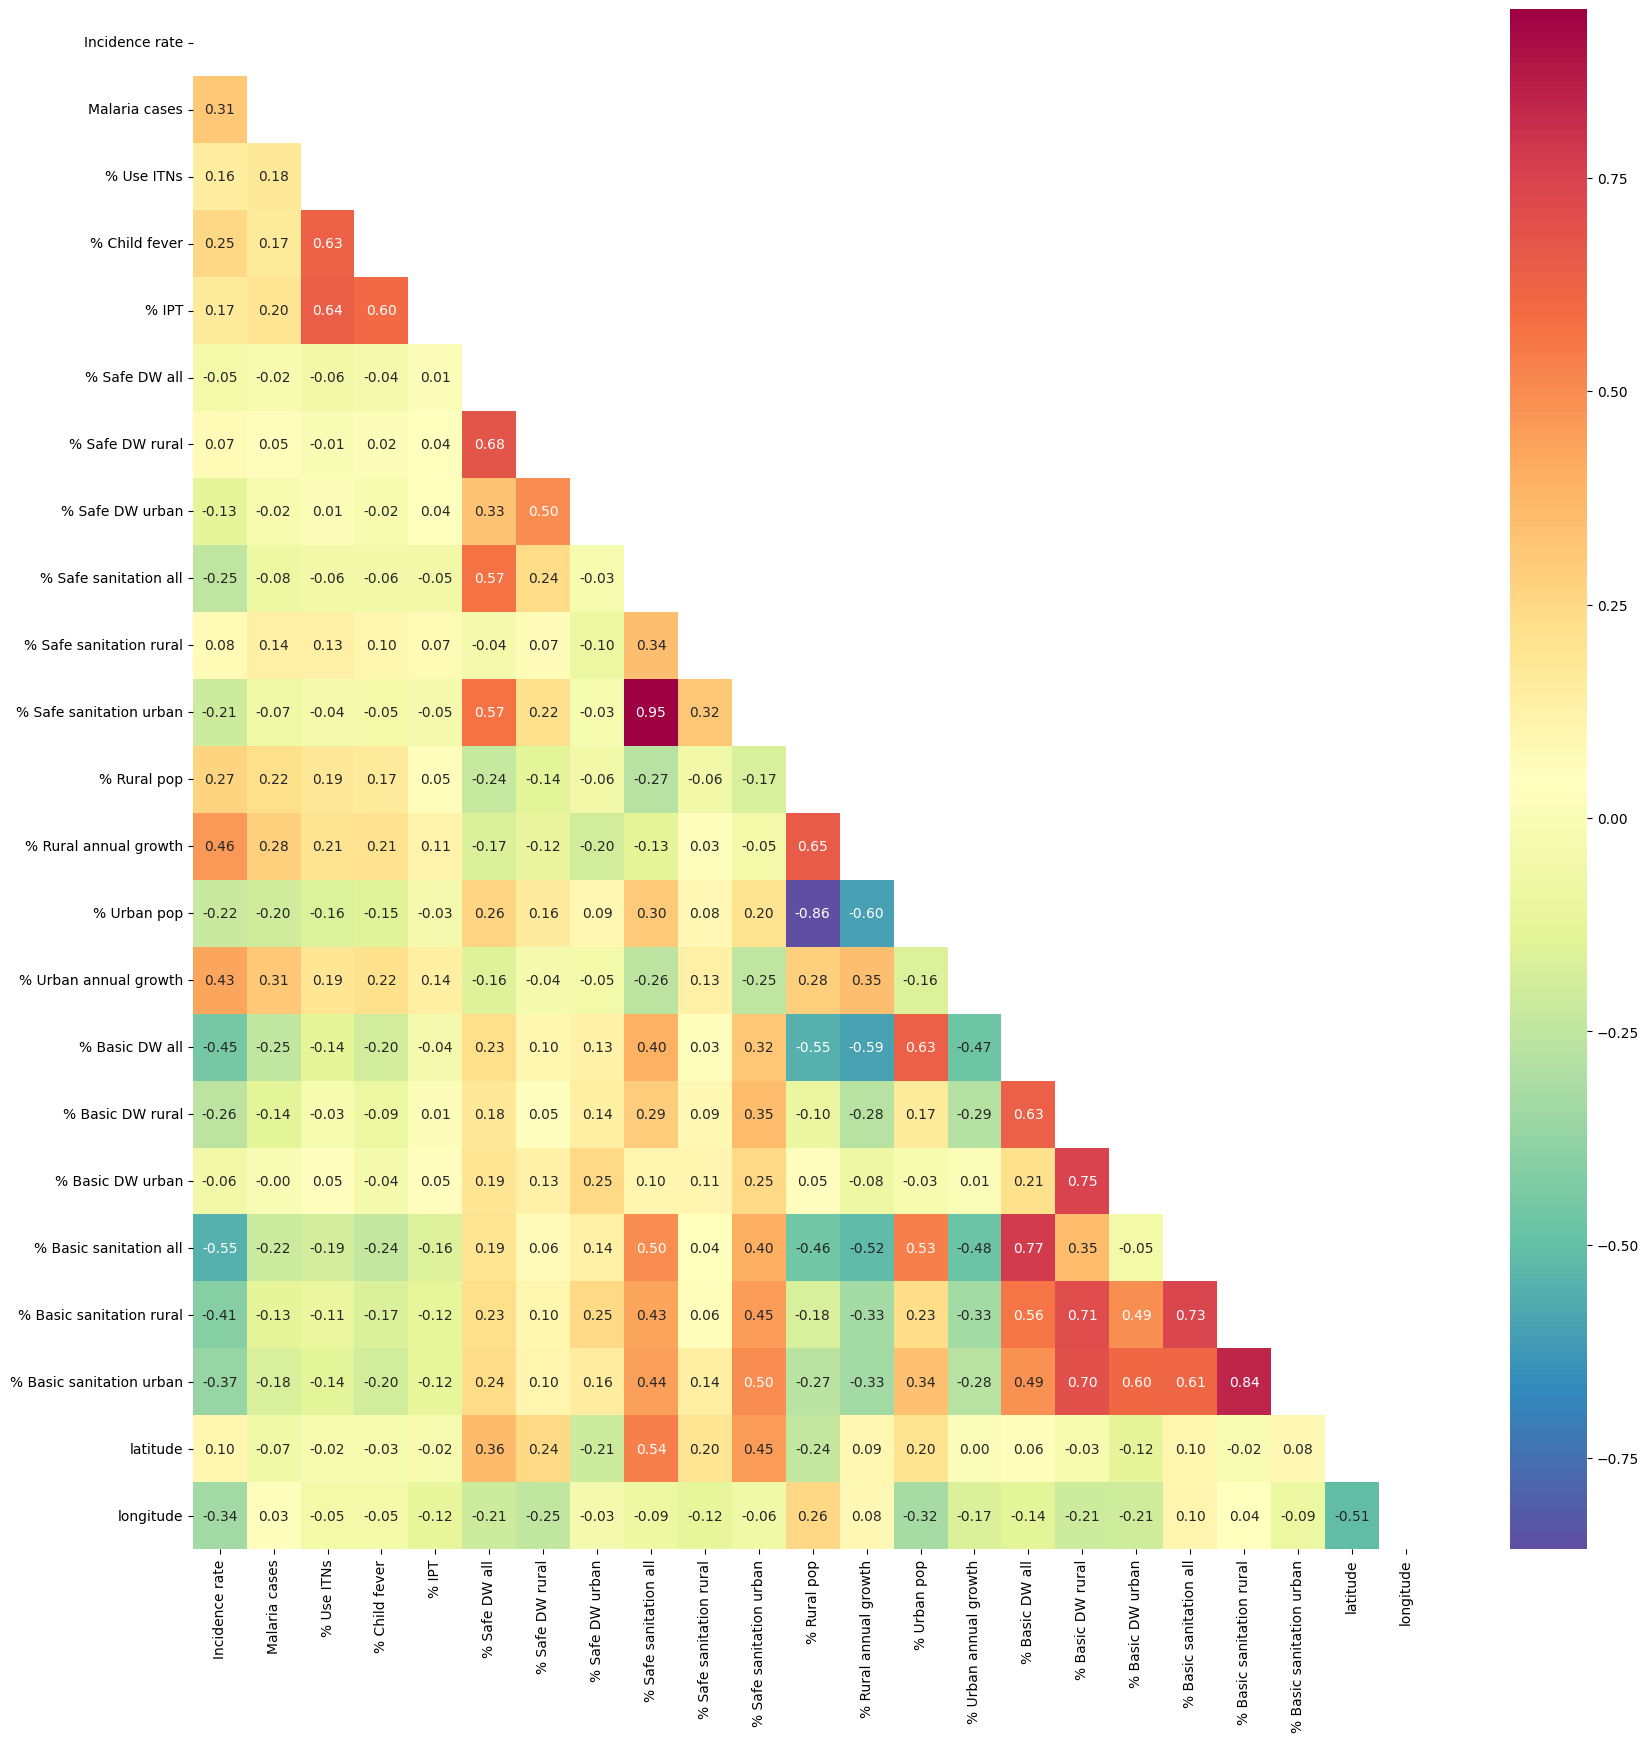

In [ ]:
# get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
mask= np.triu(top_corr_features)
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True, fmt='.2f', mask=mask, cmap='Spectral_r');
# sns.heatmap(df.corr(),annot=True,fmt='.2f')

# Exploratory Data Analysis

REGIONAL ANALYSIS OF MALARIA CASES AND INCIDENCE RATE

In [ ]:
# categorize Incidence rate & Malaria cases per country
africa_aggregate = df.groupby('Country Name')[['Incidence rate', 'Malaria cases']].sum()

In [ ]:
# filter five separate dataframes from the aggregated dataframe
eastern_region = africa_aggregate.query('`Country Name`== @east')
western_region = africa_aggregate.query('`Country Name`== @west')
southern_region = africa_aggregate.query('`Country Name`== @south')
northern_region = africa_aggregate.query('`Country Name`== @north')
central_region = africa_aggregate.query('`Country Name` == @central') 

In [ ]:
# create empty lists to store total incidence rate and malaria cases for each region
total_incidence = []
total_malaria_cases = []

# iterate through each region dataframe
for region_df in [eastern_region, western_region, southern_region, northern_region, central_region]:
    
    # sum the incidence rate and malaria cases columns for the region dataframe
    region_incidence = region_df['Incidence rate'].sum()
    region_malaria_cases = region_df['Malaria cases'].sum()
    
    # append the total incidence rate and malaria cases for the region to the respective lists
    total_incidence.append(region_incidence)
    total_malaria_cases.append(region_malaria_cases)

In [ ]:
region = ['East', 'West', 'South', 'North', 'Central']
# create a dictionary with the three lists
data = {'area':region, 'regional_incidence':total_incidence, 'regional_malaria_cases':total_malaria_cases}

# create a pandas dataframe from the dictionary
pie_data = pd.DataFrame(data)

pie_data

,area,regional_incidence,regional_malaria_cases
0,East,29796.41,325054622
1,West,51959.61,212934849
2,South,1208.17,3571694
3,North,388.44,7265664
4,Central,25388.67,116310244


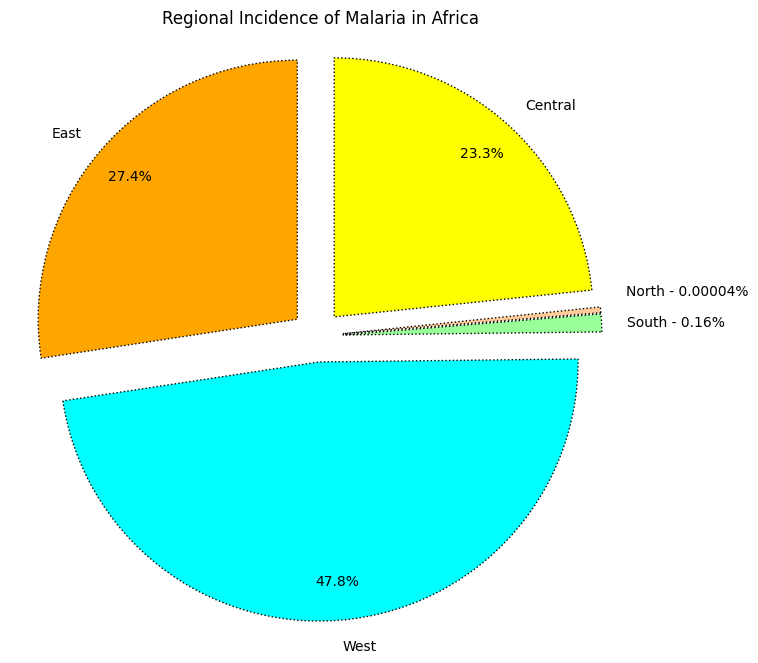

In [ ]:
# set colors for the pie chart
colors = ['#FFA500','#00FFFF','#99ff99','#ffcc99', '#FFFF00']

# plot the pie chart for regional incidence
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(pie_data['regional_incidence'], colors=colors, labels=['East', 'West', 'South - 0.16%', 'North - 0.00004%\n\n', 'Central'],
        autopct=lambda pct: '' if pct < 5 else f'{pct:.1f}%', startangle=90, pctdistance=0.85, 
        explode=[0.1, 0.1, 0.1, 0.1, 0.1], wedgeprops={'linewidth': 1, 'edgecolor': 'black', 'linestyle': 'dotted'}, shadow=False)

plt.title('Regional Incidence of Malaria in Africa')
plt.axis('equal')

# show the plot
plt.show()


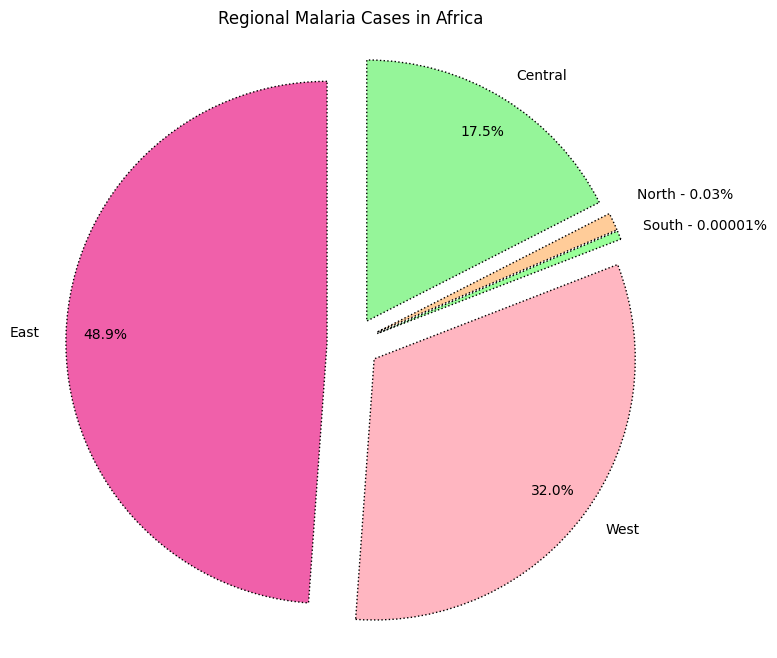

In [ ]:
# set colors for the pie chart
colors = ['#F060AA','#FFB6C1','#99ff99','#ffcc99', '#95F599']

# plot the pie chart for regional incidence
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(pie_data['regional_malaria_cases'], colors=colors, labels=['East', 'West', 'South - 0.00001%', 'North - 0.03%\n\n', 'Central'],
        autopct=lambda pct: '' if pct < 5 else f'{pct:.1f}%', startangle=90, pctdistance=0.85, 
        explode=[0.1, 0.1, 0.1, 0.1, 0.1], wedgeprops={'linewidth': 1, 'edgecolor': 'black', 'linestyle': 'dotted'}, shadow=False)

plt.title('Regional Malaria Cases in Africa')
plt.axis('equal')

# show the plot
plt.show()

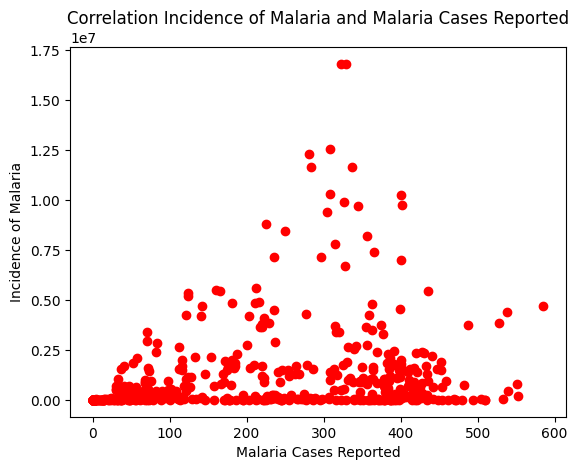

In [ ]:
# scatterplot of Incidence of Malaria and Malaria Cases Reported
plt.scatter(x=df['Incidence rate'], y=df['Malaria cases'],color='red')
plt.title("Correlation Incidence of Malaria and Malaria Cases Reported")
plt.xlabel("Malaria Cases Reported")
plt.ylabel("Incidence of Malaria")
plt.show()

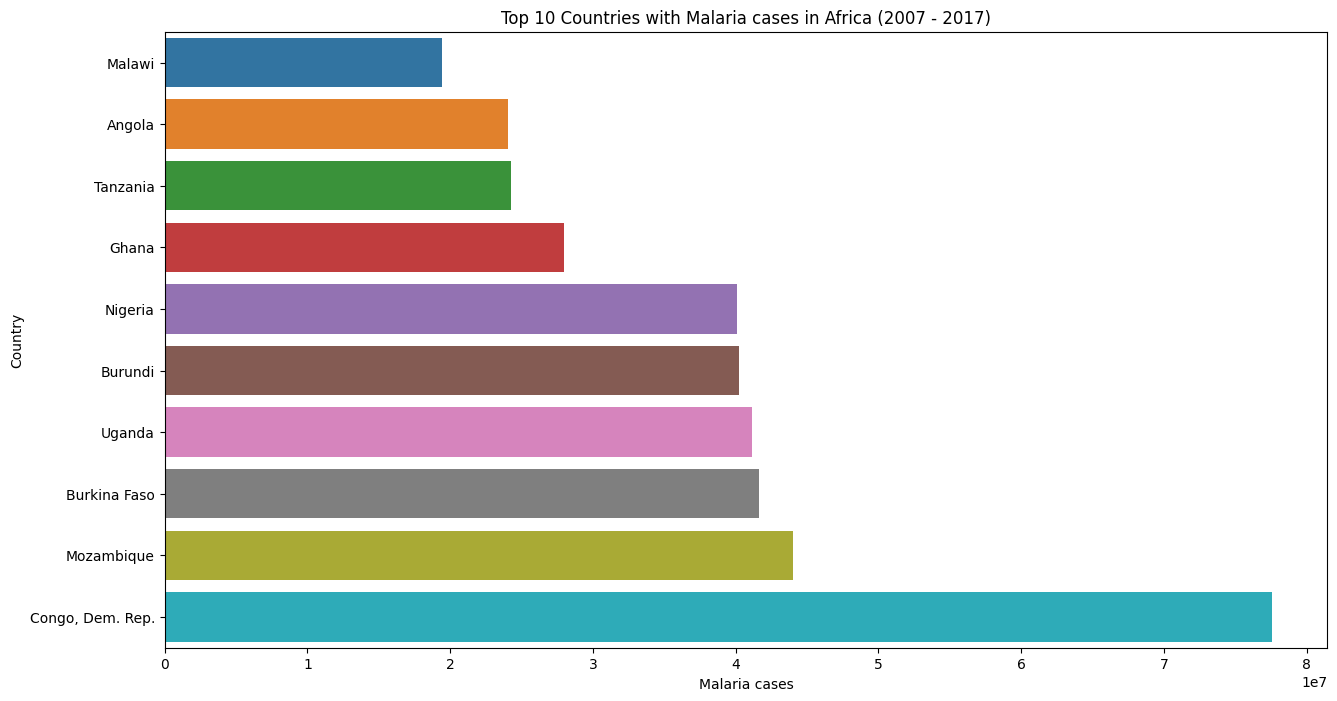

In [ ]:
#TOP COUNTRIES WITH MALARIA CASES
malaria_case_per_country  =  df[['Country Name','Malaria cases']].groupby('Country Name').sum().sort_values(by='Malaria cases')
malaria_case_per_country = malaria_case_per_country.tail(10)
a = malaria_case_per_country.reset_index()
# malaria_case_per_country = malaria_case_per_country.to_frame()

#
plt.figure(figsize=(15,8))
sns.barplot(x="Malaria cases", y="Country Name", data = a)

plt.title("Top 10 Countries with Malaria cases in Africa (2007 - 2017)")
plt.xlabel("Malaria cases")
plt.ylabel("Country")
plt.show()

YEARLY DYNAMICS OF MALARIA CASES AND INCIDENCE RATES

In [ ]:
#using Pivot table for average yearly Malaria cases and incidence rates

pivot = pd.pivot_table(model_data, index = ['Year'], values = ['Incidence rate','Malaria cases'])
np.round(pivot,2)

,Incidence rate,Malaria cases
Year,,
2007,194.60,187080.39
2008,189.12,176081.00
2009,187.77,266937.33
2010,184.33,410828.89
2011,177.47,425978.98
2012,175.19,735541.13
2013,171.41,873610.35
2014,163.65,1426459.52
2015,163.65,1721639.37


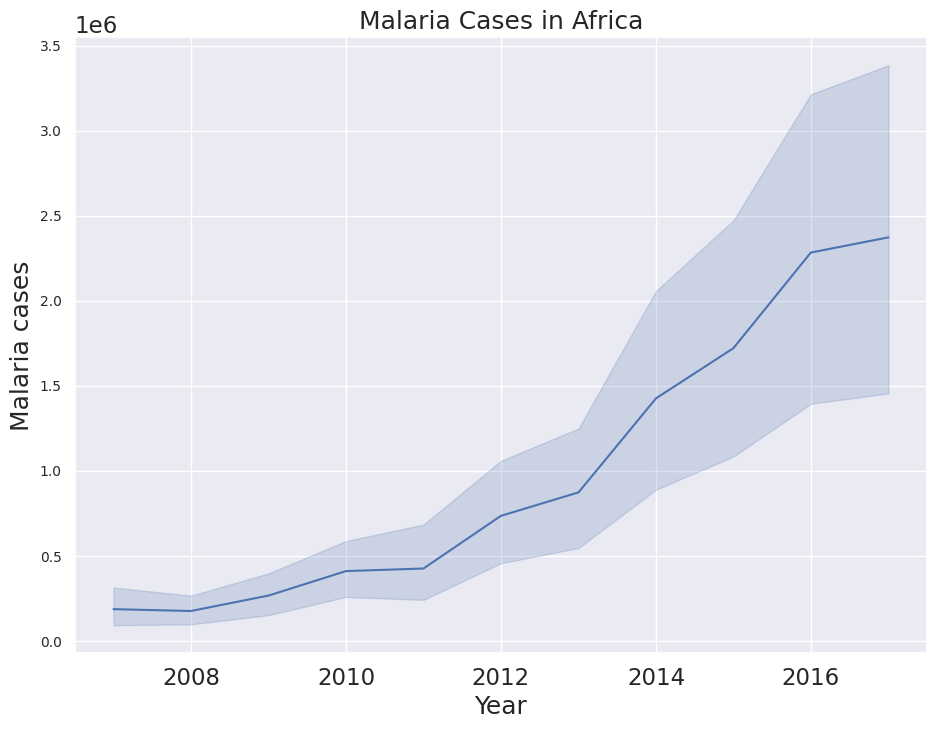

In [ ]:
# Line Plot - Malaria Cases

sns.set(font_scale = 1.5)
plt.figure(figsize=(11,8))
plt.yticks(fontsize=10)

sns.lineplot(x='Year', y='Malaria cases', data=df).set(title='Malaria Cases in Africa');

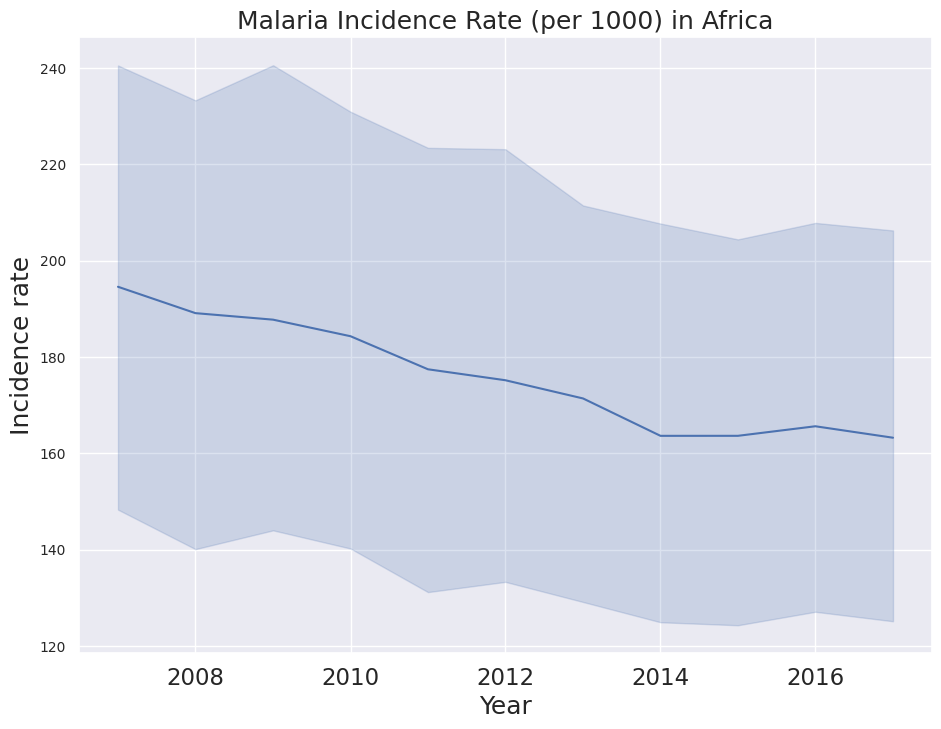

In [ ]:
#Line Plot - Incidence rate

sns.set(font_scale = 1.5)
plt.figure(figsize=(11,8))
plt.yticks(fontsize=10)

sns.lineplot(x='Year', y='Incidence rate', data=df).set(title='Malaria Incidence Rate (per 1000) in Africa');

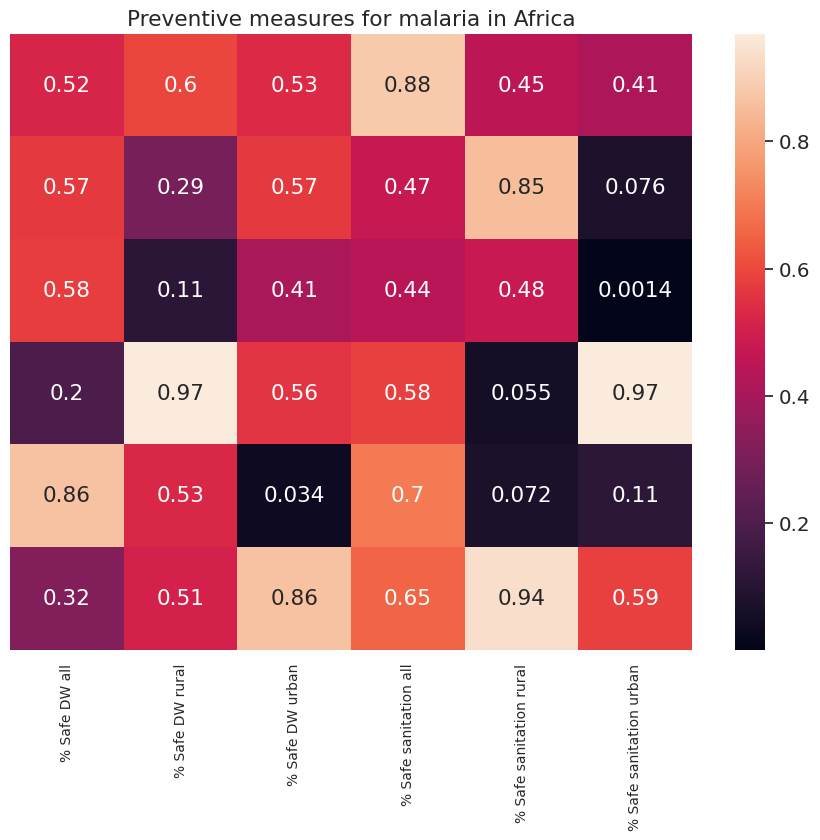

In [ ]:
# dataset for preventive measures
preventive_malaria_df = pd.DataFrame(np.random.random((6,6)), 
                                     columns=["% Safe DW all","% Safe DW rural","% Safe DW urban", "% Safe sanitation all", "% Safe sanitation rural", "% Safe sanitation urban"])

# heatmap for preventive measures
sns.set(font_scale = 1.3)
plt.figure(figsize=(11,8))
plt.xticks(fontsize=10)
sns.heatmap(preventive_malaria_df, annot=True, yticklabels=False).set(title='Preventive measures for malaria in Africa');

**OBSERVATION:**

We can observe that incidence cases reduced from 2007 -2017, although year 2015 - 2016 witnessed a slight increase in incidence cases.

In summary, from the univariate analysis between malaria cases and incidence rates shows that malaria cases increased but the incidence rate decreased which means a negative correlation exist between both features. This can also be attributed to improvement in preventive measures down the years.

GEOGRAPHICAL ANALYSIS

In [ ]:
#convert year to string
df.Year = df.Year.astype(str)

In [ ]:
#Incidence of Malaria at risk
fig1 = px.choropleth(df,locations=df['Country Code'],
                     color=df['Incidence rate'],
                     color_continuous_scale='Blues',
                     locationmode='ISO-3',scope='africa',
                     animation_frame=df['Year'],title="Incidence of Malaria at risk in Africa",
                     labels={'color':'Incidence of Malaria'})

fig1.show()

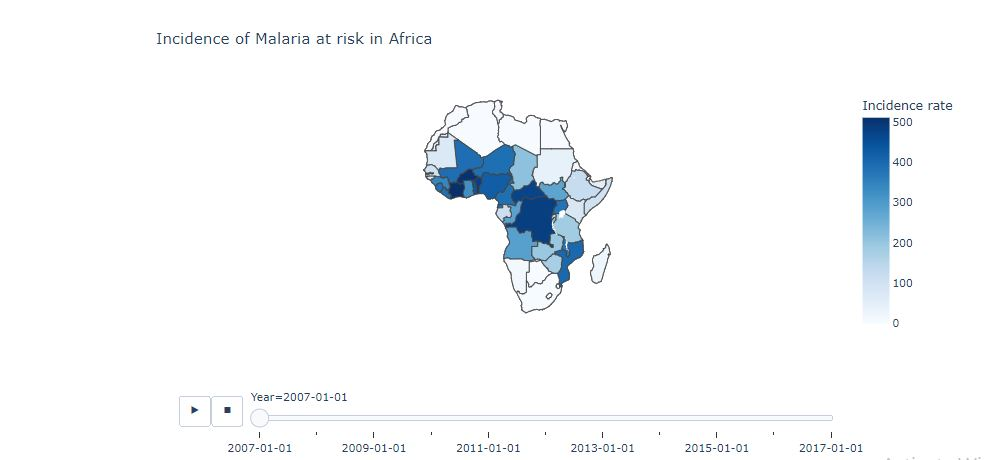

In [ ]:
# Malaria cases at risk
fig2 = px.choropleth(df,locations=df['Country Code'],
                     color=df['Malaria cases'],
                     color_continuous_scale='Blues', 
                     locationmode='ISO-3',scope='africa',
                     animation_frame=df['Year'],title="Malaria cases in Africa",
                     labels={'color':'Malaria cases'})

fig2.show()

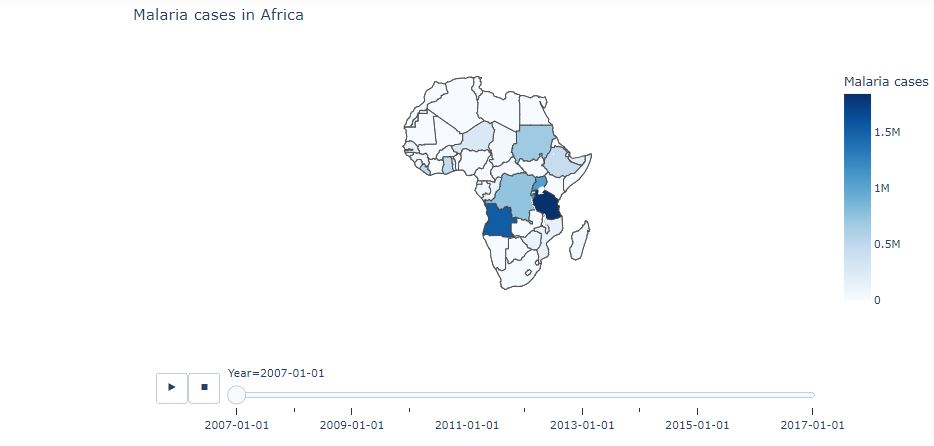

# Modeling

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler

#import regression models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import pickle

In [ ]:
# view the first five rows of the model dataset
model_data.head()

,Country Name,Year,Country Code,Incidence rate,Malaria cases,% Use ITNs,% Child fever,% IPT,% Safe DW all,% Safe DW rural,% Safe DW urban,% Safe sanitation all,% Safe sanitation rural,% Safe sanitation urban,% Rural pop,% Rural annual growth,% Urban pop,% Urban annual growth,% Basic DW all,% Basic DW rural,% Basic DW urban,% Basic sanitation all,% Basic sanitation rural,% Basic sanitation urban,latitude,longitude,geometry,Region
0,Algeria,2007,DZA,0.01,26.0,0.0,0.0,0.0,0.0,0.0,0.00,18.24,19.96,17.33,34.65,-0.60,65.35,2.71,91.68,85.83,94.78,85.85,76.94,90.57,28.033886,1.659626,POINT (28.033886 1.659626),North Africa
1,Angola,2007,AGO,286.72,1533485.0,18.0,29.8,1.5,0.0,0.0,0.00,0.00,0.00,0.00,42.48,1.91,57.52,5.01,47.96,23.77,65.83,37.26,14.00,54.44,-11.202692,17.873887,POINT (-11.202692 17.873887),Central Africa
2,Benin,2007,BEN,480.24,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,58.44,1.99,41.56,4.09,63.78,54.92,76.24,11.80,4.29,22.36,9.307690,2.315834,POINT (9.307689999999999 2.315834),West Africa
3,Botswana,2007,BWA,1.03,390.0,0.0,0.0,0.0,0.0,0.0,83.96,0.00,0.00,0.00,42.07,-1.44,57.93,4.80,78.89,57.60,94.35,61.60,39.99,77.30,-22.328474,24.684866,POINT (-22.328474 24.684866),Southern Africa
4,Burkina Faso,2007,BFA,503.80,44246.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,77.00,2.16,23.00,5.91,52.27,45.13,76.15,15.60,6.38,46.49,12.238333,-1.561593,POINT (12.238333 -1.561593),West Africa


In [ ]:
# find categorical variable and encode
cat_features = model_data.select_dtypes(include=['object', 'category']).columns
num_features = [col for col in model_data.columns if col not in cat_features]

# print categorical variable
print("Categorical features: ", cat_features)

# print numerical variable
print("Numerical features: ", num_features)

Categorical features:  Index(['Country Name', 'Country Code', 'geometry', 'Region'], dtype='object')
Numerical features:  ['Year', 'Incidence rate', 'Malaria cases', '% Use ITNs', '% Child fever', '% IPT', '% Safe DW all', '% Safe DW rural', '% Safe DW urban', '% Safe sanitation all', '% Safe sanitation rural', '% Safe sanitation urban', '% Rural pop', '% Rural annual growth', '% Urban pop', '% Urban annual growth', '% Basic DW all', '% Basic DW rural', '% Basic DW urban', '% Basic sanitation all', '% Basic sanitation rural', '% Basic sanitation urban', 'latitude', 'longitude']


In [ ]:
# label encoding
le = LabelEncoder()
for i in cat_features:
    model_data[i] = le.fit_transform(model_data[i])

In [ ]:
# the features - 'Year' will be dropped as it represents a timeframe the data was collected as well as other features due to their correlation 
# 'Country Name', 'Country Code', 'latitude', 'longitude', 'geometry' will be dropped due to less predictor factors
''' #This columns will be dropped due to too many NAN values
'% Safe DW all', '% Safe DW rural', '% Safe DW urban', '% Safe sanitation all', '% Safe sanitation rural', '% Safe sanitation urban', 
'% Rural annual growth', '% Urban annual growth', '% Basic DW rural', '% Basic DW urban', 
'% Basic sanitation rural', '% Basic sanitation urban' 
'''

cols_to_drop = ['Country Name', 'Year', 'Country Code', '% Safe DW all', '% Safe DW rural', '% Safe DW urban', 
                '% Safe sanitation all', '% Safe sanitation rural', '% Safe sanitation urban', 
                '% Rural annual growth', '% Urban annual growth', '% Basic DW rural', '% Basic DW urban', 
                '% Basic sanitation rural', '% Basic sanitation urban', 'latitude', 'longitude', 'geometry']
# drop columns
model_data = model_data.drop(columns=cols_to_drop)

In [ ]:
# Rename all columns with list
cols = ['Incidence rate', 'Malaria cases',
       'Use of insecticide-treated bed nets (% of under age 5 population)',
       'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
       'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
       'Rural population (%)', 'Urban population (%)', 'Drinking Water (%)', "Sanitation (%)", 'Region']
model_data.columns = cols

In [ ]:
# create explanatory variable (X) and response variable (y)
X = model_data.drop('Incidence rate', axis=1)
y = model_data['Incidence rate']

In [ ]:
# split data into train and test sets - 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (415, 9)
y_train shape: (415,)
X_test shape: (179, 9)
y_test shape: (179,)


In [ ]:
# Scaling numeric features using sklearn StandardScalar
numeric = [ 'Malaria cases',
            'Use of insecticide-treated bed nets (% of under age 5 population)',
            'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
            'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
            'Rural population (%)', 'Urban population (%)', 'Drinking Water (%)', "Sanitation (%)"]

sc=StandardScaler()
X_train[numeric]=sc.fit_transform(X_train[numeric])
X_test[numeric]=sc.transform(X_test[numeric])

In [ ]:
#  assert data split to avoid leakage
print(len(X_train) + len(X_test) == len(X))
print(len(y_train) + len(y_test) == len(y))

True
True


In [ ]:
# instantiate models
modelclasses = {'LinearR': LinearRegression(), 
                'SVR': SVR(), 
                'LassoR': Lasso(), 
                'RidgeR': Ridge(),
                'RandomForest': RandomForestRegressor()
                }

In [ ]:
# Iteration of models

# create a list to store model results
rmse_scores = []
r2_scores = []

for model_name, model_method in modelclasses.items():
       
    # fit model to training data
    model_method.fit(X_train, y_train)
    
    # predict the outcomes on the test set
    y_pred = model_method.predict(X_test)
    
    # append RMSE evaluation metric for the model to the list 
    rmse_scores.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    
    # append R2 score evaluation metric for the model to the list
    r2_scores.append(metrics.r2_score(y_test, y_pred))
    
# create a dataframe to store the results
reg_results = pd.DataFrame({"Model":modelclasses.keys(), "RMSE Score": rmse_scores, "R2 Score": r2_scores})
reg_results

,Model,RMSE Score,R2 Score
0,LinearR,126.787373,0.348628
1,SVR,144.578805,0.152995
2,LassoR,126.802350,0.348474
3,RidgeR,126.784699,0.348656
4,RandomForest,59.003023,0.858933


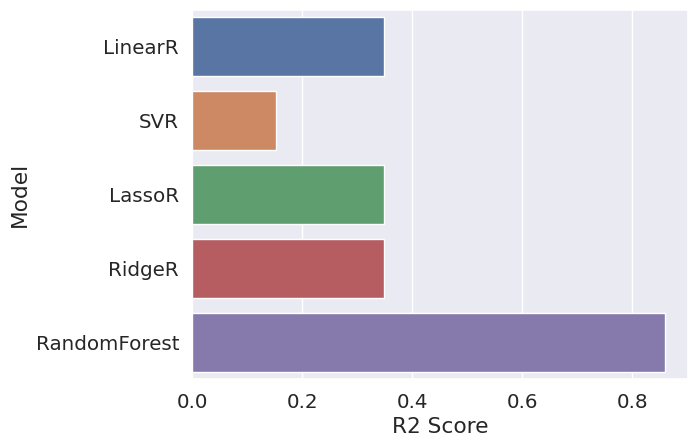

In [ ]:
# plot the R2 Score 
sns.barplot(x=reg_results['R2 Score'], y=reg_results.Model);

In [ ]:
# Hyperparameter tuning for Random Forest Regressor using RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=RandomForestRegressor(),
                                  param_distributions={
                                    'max_depth': [10, 20, 30, 40],
                                    'min_samples_split': [2, 5, 10],
                                    'n_estimators': [100, 80, 60, 55, 51, 45]
                                  },cv=5, scoring="r2",verbose=1,n_jobs=-1, 
                                  n_iter=50, random_state = 1
                                )

random_search.fit(X_train,y_train)

best_params=random_search.best_params_

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", random_search.best_estimator_)
print("\n The best score across ALL searched params:\n", random_search.best_score_)
print("\n The best parameters across ALL searched params:\n", best_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
 Results from Random Search 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=30)

 The best score across ALL searched params:
 0.8280622735883796

 The best parameters across ALL searched params:
 {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 30}


In [ ]:
# Build Random Forest Regression Model
model = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], min_samples_split=best_params['min_samples_split'])

# fit model
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluation Metrics
def evaluation_metrics_func(y_test, y_pred):
    
    #print('Evaluation metric results:-')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
    print(f'R2 is : {metrics.r2_score(y_test, y_pred)}',end='\n\n')

In [ ]:
# computing the evaluation metrics
evaluation_metrics_func(y_test, y_pred)

RMSE is : 60.49012084836756
R2 is : 0.8517325516552123



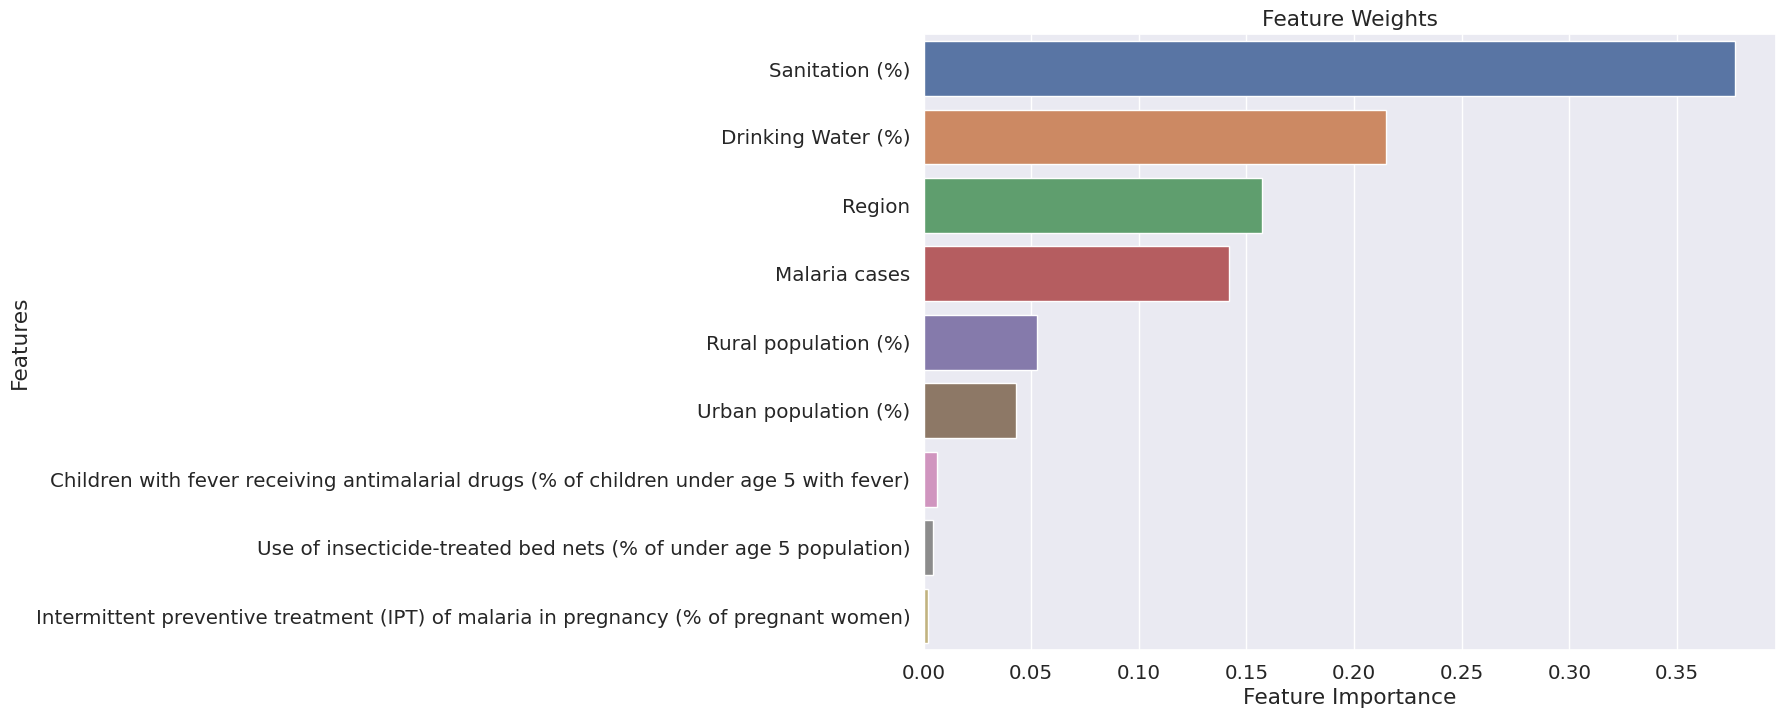

In [ ]:
# obtain feature weights for random forest regression
feat_imp = model.feature_importances_

# create a dataframe of feature weight
feat_imp_ = pd.DataFrame(feat_imp, X.columns, columns=["Feature Importance"]).sort_values(by="Feature Importance", ascending=False)

# plot feature weights
plt.figure(figsize=(11,8))
plt.ylabel('Features')
plt.title('Feature Weights')
sns.barplot(x=feat_imp_['Feature Importance'], y=feat_imp_.index);

In [ ]:
# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))